In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("../LADataSets/LAX_Passenger_Traffic_By_Terminal.csv")

In [3]:
df.info()
df.head()
df.tail()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DataExtractDate         6777 non-null   object
 1   ReportPeriod            6777 non-null   object
 2   Terminal                6773 non-null   object
 3   Arrival_Departure       6777 non-null   object
 4   Domestic_International  6777 non-null   object
 5   Passenger_Count         6777 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 317.8+ KB


,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
0,04/18/2018 03:12:41 PM,06/01/2015 12:00:00 AM,T3,Arrival,Domestic,294423
1,04/18/2018 03:12:41 PM,08/01/2012 12:00:00 AM,T8,Departure,International,5502
2,04/18/2018 03:12:41 PM,01/01/2017 12:00:00 AM,T1,Departure,International,11198
3,04/18/2018 03:12:41 PM,03/01/2009 12:00:00 AM,T4,Departure,Domestic,373300
4,04/18/2018 03:12:41 PM,11/01/2015 12:00:00 AM,T2,Arrival,International,148428


,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
6772,06/29/2021 10:06:21 AM,05/01/2021 12:00:00 AM,T2,Departure,Domestic,395010
6773,06/11/2021 12:35:47 PM,05/01/2021 12:00:00 AM,T7,Arrival,International,50595
6774,06/11/2021 12:35:47 PM,03/01/2021 12:00:00 AM,TBIT,Arrival,International,121931
6775,06/11/2021 12:35:47 PM,05/01/2021 12:00:00 AM,T4,Arrival,International,2118
6776,06/29/2021 10:06:21 AM,05/01/2021 12:00:00 AM,NaN,Departure,Domestic,20561


,Passenger_Count
count,6777.000000
mean,150460.032315
std,154186.577201
min,0.000000
25%,17275.000000
50%,96870.000000
75%,262724.000000
max,908951.000000


In [4]:
def groupByYear(dframe,terminal):

    tempDf = dframe.copy()
    filter = tempDf['Domestic_International'] == terminal
    tempDf = tempDf[filter].copy()
    
    tempDf['ReportDate'] = pd.to_datetime(tempDf['ReportPeriod'])

    passengerCount = df.groupby(tempDf['ReportDate'].dt.to_period('Y')).sum()
    passengerCount
    passengerCount.values
    #df11 = df11.resample('Y').asfreq().fillna(0)
    dfPassengerCount = pd.DataFrame(data=passengerCount.values,columns = ['Passenger_Count'])
    dfPassengerCount['Year'] = passengerCount.index
    dfPassengerCount.head()
    del tempDf
    return dfPassengerCount

In [6]:
dfdomesticPassengerCount = groupByYear(df,"Domestic")
dfInternationalPassengerCount = groupByYear(df,"International")

In [7]:
dfInternationalPassengerCount
dfdomesticPassengerCount

,Passenger_Count,Year
0,16910748,2006
1,17247968,2007
2,16683694,2008
3,15100930,2009
4,15935982,2010
5,16731324,2011
6,17152914,2012
7,17852139,2013
8,19106746,2014
9,20740075,2015


,Passenger_Count,Year
0,44129926,2006
1,45190615,2007
2,43137056,2008
3,41419913,2009
4,43134145,2010
5,45130728,2011
6,46535207,2012
7,48813587,2013
8,51556773,2014
9,54216230,2015


In [8]:
dfTotalPassengersByYear = pd.DataFrame()
dfTotalPassengersByYear['Year'] = dfdomesticPassengerCount['Year']
dfTotalPassengersByYear['Passenger_Count'] = dfdomesticPassengerCount['Passenger_Count'] + dfInternationalPassengerCount['Passenger_Count']

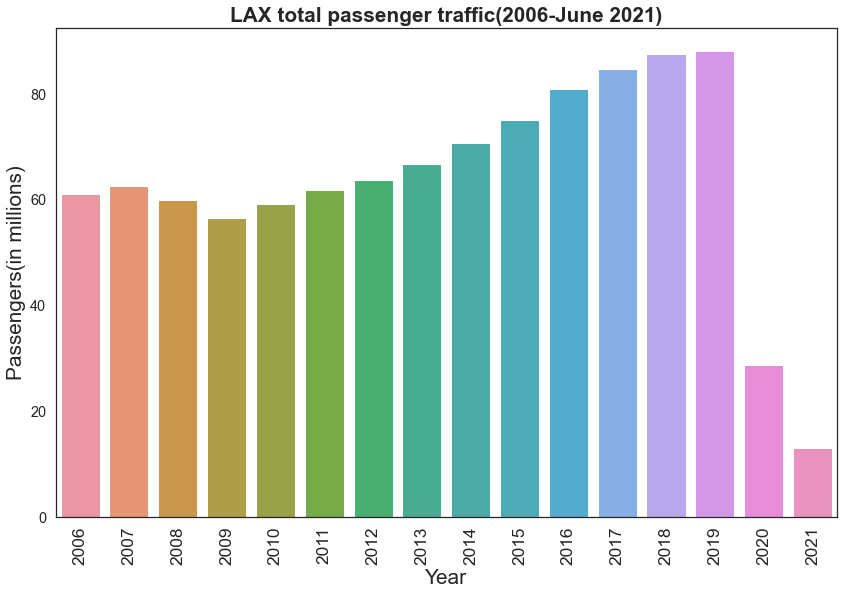

In [9]:
plt.figure(figsize=(14,9))
sns.set_theme(context='notebook',style='white')
plt.xticks(rotation = 90,fontsize = "x-large")
plt.yticks(fontsize = "large")
plt.title(label="LAX total passenger traffic(2006-June 2021)",fontweight='bold',fontsize='xx-large')
ax = sns.barplot(x=dfTotalPassengersByYear['Year'],y=dfTotalPassengersByYear['Passenger_Count']/1_000_000)
ax.set_xlabel(xlabel='Year', fontsize='xx-large',loc='center')
ax.set_ylabel(ylabel='Passengers(in millions)', fontsize='xx-large',loc='center')
plt.show();

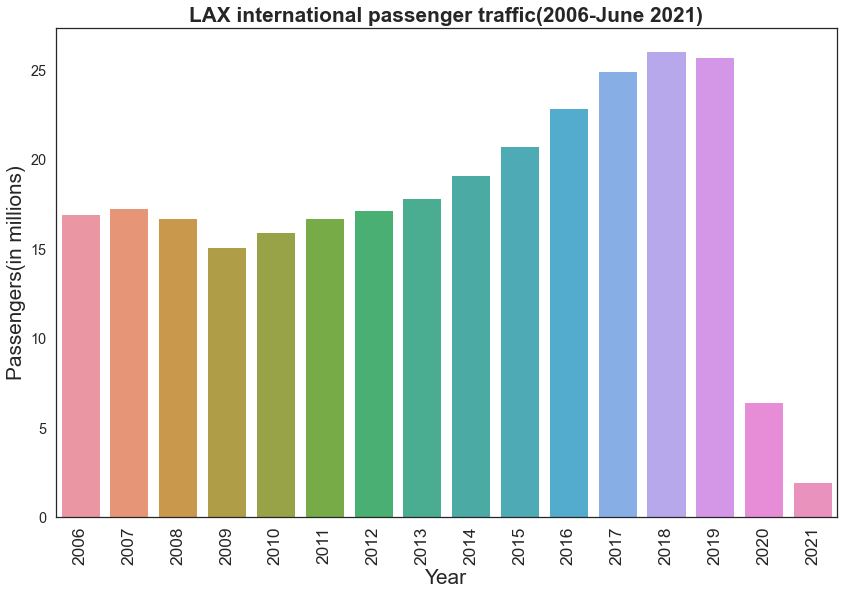

In [10]:
plt.figure(figsize=(14,9))
sns.set_theme(context='notebook',style='white')
plt.xlabel(xlabel= "",fontsize="xx-large")
plt.ylabel(ylabel= "",fontsize="xx-large")
plt.xticks(rotation = 90,fontsize = "x-large")
plt.yticks(fontsize = "large")
plt.title(label="LAX international passenger traffic(2006-June 2021)",fontweight='bold',fontsize='xx-large')
ax = sns.barplot(x=dfInternationalPassengerCount['Year'],y=dfInternationalPassengerCount['Passenger_Count']/1000_000)
ax.set(xlabel="Year", ylabel="Passengers(in millions)" );

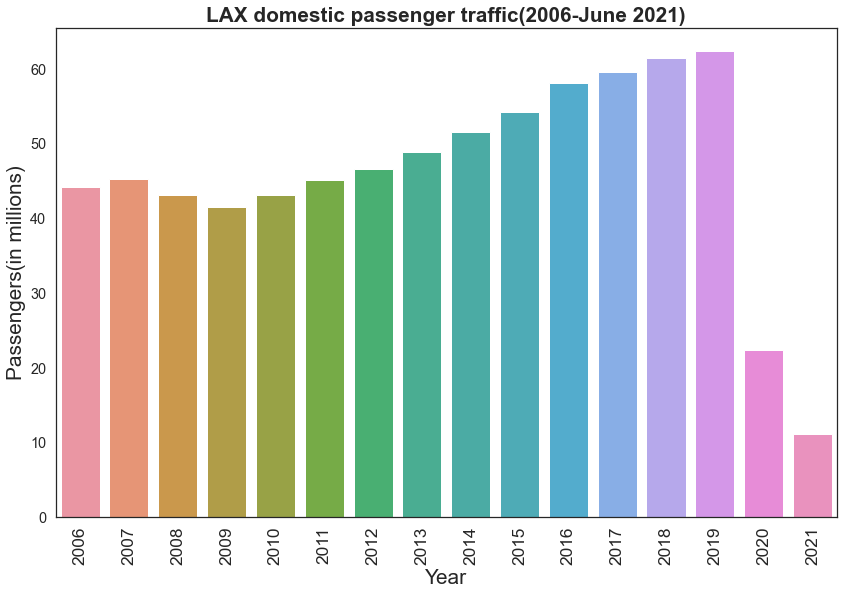

In [11]:
plt.figure(figsize=(14,9))
sns.set_theme(context='notebook',style='white')
plt.xticks(rotation = 90,fontsize = "x-large")
plt.yticks(fontsize = "large")
plt.title(label="LAX domestic passenger traffic(2006-June 2021)",fontweight='bold',fontsize='xx-large')
ax = sns.barplot(x=dfdomesticPassengerCount['Year'],y=dfdomesticPassengerCount['Passenger_Count']/1_000_000)
ax.set_xlabel(xlabel='Year', fontsize='xx-large',loc='center')
ax.set_ylabel(ylabel='Passengers(in millions)', fontsize='xx-large',loc='center')
plt.show();

In [12]:
domesticPassengersXTerminals = df[(df['Domestic_International'] == 'Domestic')].groupby('Terminal')['Passenger_Count'].agg('sum')
dfDomesticPassengersXTerminals = pd.DataFrame(data = domesticPassengersXTerminals.values,columns = ['Passenger_Count'])
dfDomesticPassengersXTerminals['Terminal'] = domesticPassengersXTerminals.index
dfDomesticPassengersXTerminals.info()
dfDomesticPassengersXTerminals

intPassengersXterminal = df[df['Domestic_International'] == 'International'].groupby('Terminal')['Passenger_Count'].agg('sum')
dfIntPassengersXTerminals = pd.DataFrame(data = intPassengersXterminal.values,columns = ['Passenger_Count'])
dfIntPassengersXTerminals['Terminal'] = intPassengersXterminal.index
dfIntPassengersXTerminals.info()
dfIntPassengersXTerminals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Passenger_Count  11 non-null     int64 
 1   Terminal         11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


,Passenger_Count,Terminal
0,17869,Imperial Terminal
1,17568494,Miscellaneous Terminal
2,135272133,T1
3,35977118,T2
4,80165364,T3
5,132373993,T4
6,103121203,T5
7,89523523,T6
8,93923860,T7
9,46860571,T8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Passenger_Count  11 non-null     int64 
 1   Terminal         11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


,Passenger_Count,Terminal
0,1089,Imperial Terminal
1,625272,Miscellaneous Terminal
2,200867,T1
3,55158375,T2
4,8025440,T3
5,14598198,T4
6,10167966,T5
7,12458269,T6
8,15819793,T7
9,1816099,T8


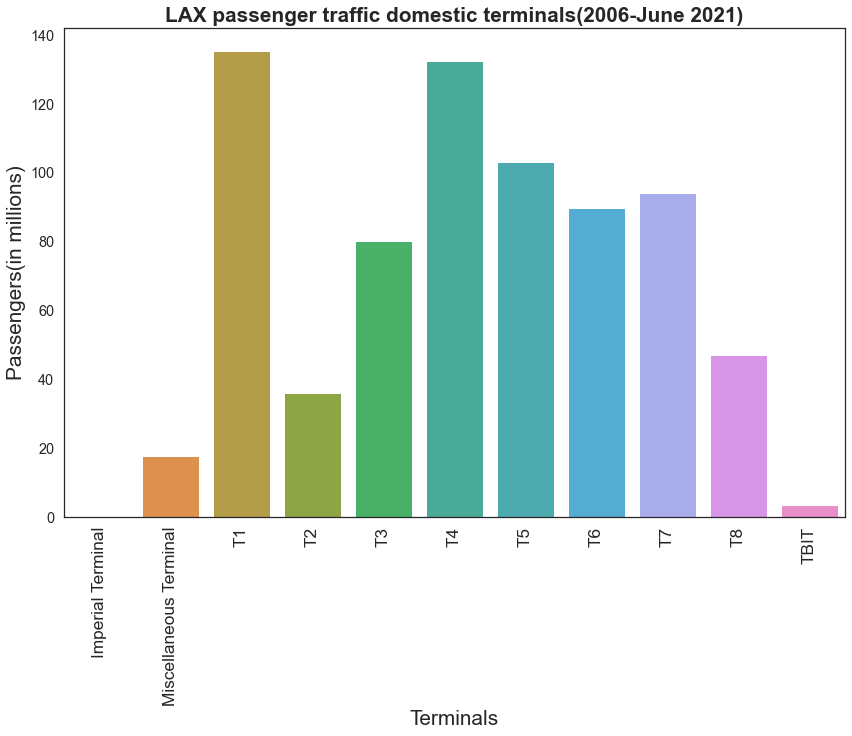

In [13]:
plt.figure(figsize=(14,9))
sns.set_theme(context='notebook',style='white')
plt.xticks(rotation = 90,fontsize = "x-large")
plt.yticks(fontsize = "large")
plt.title(label="LAX passenger traffic domestic terminals(2006-June 2021)",fontweight='bold',fontsize='xx-large')
ax = sns.barplot(x=dfDomesticPassengersXTerminals['Terminal'],y=dfDomesticPassengersXTerminals['Passenger_Count']/1_000_000,
                data=dfDomesticPassengersXTerminals['Passenger_Count'])
ax.set_xlabel(xlabel='Terminals', fontsize='xx-large',loc='center')
ax.set_ylabel(ylabel='Passengers(in millions)', fontsize='xx-large',loc='center')
plt.show();

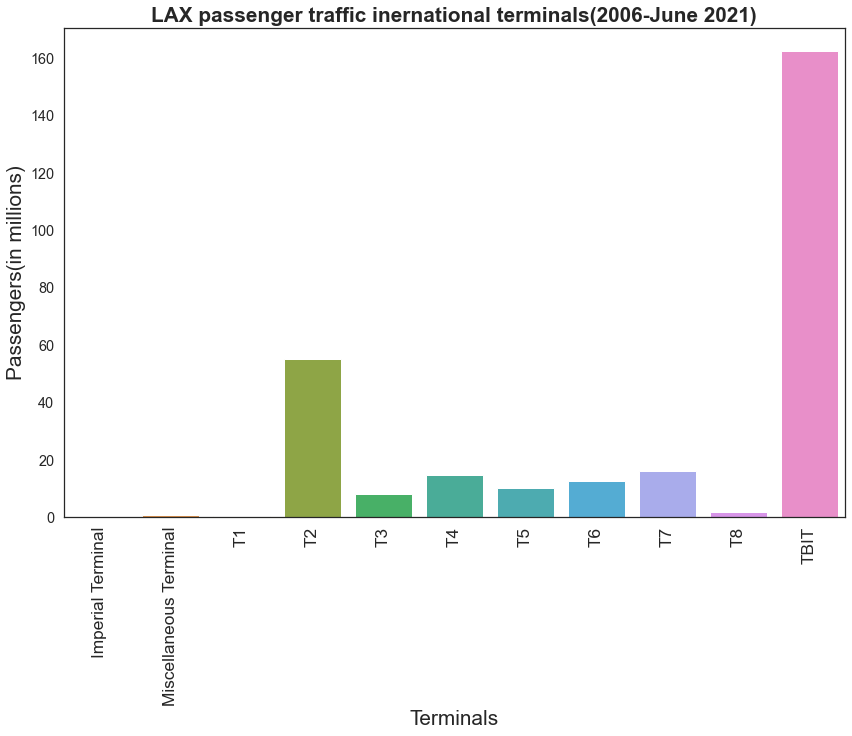

In [14]:
plt.figure(figsize=(14,9))
sns.set_theme(context='notebook',style='white')
plt.xticks(rotation = 90,fontsize = "x-large")
plt.yticks(fontsize = "large")
plt.title(label="LAX passenger traffic inernational terminals(2006-June 2021)",fontweight='bold',fontsize='xx-large')
#plt.figtext(x=0,y=0,s="LAX Domestic Passenger Traffic in millions",fontweight='bold',fontsize='large');
ax = sns.barplot(x=dfIntPassengersXTerminals['Terminal'],y=dfIntPassengersXTerminals['Passenger_Count']/1_000_000,
            data=dfIntPassengersXTerminals['Passenger_Count'])
ax.set_xlabel(xlabel='Terminals', fontsize='xx-large',loc='center')
ax.set_ylabel(ylabel='Passengers(in millions)', fontsize='xx-large',loc='center')
plt.show();